In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [2]:
df= pd.read_excel("C:\\data science class\\assignments\\Clustering\\EastWestAirlines.xlsx", sheet_name='data')
df.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

<Axes: >

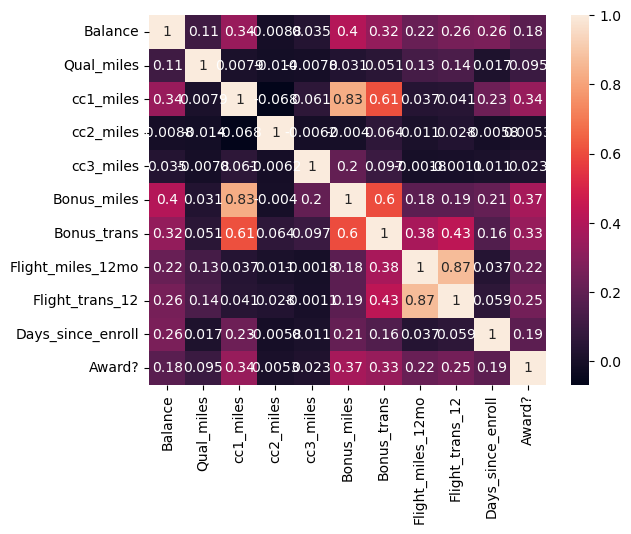

In [3]:
print(df.describe())
df.drop(columns=['ID#']).corr()
sns.heatmap(df.drop(columns=['ID#']).corr(),annot=True)

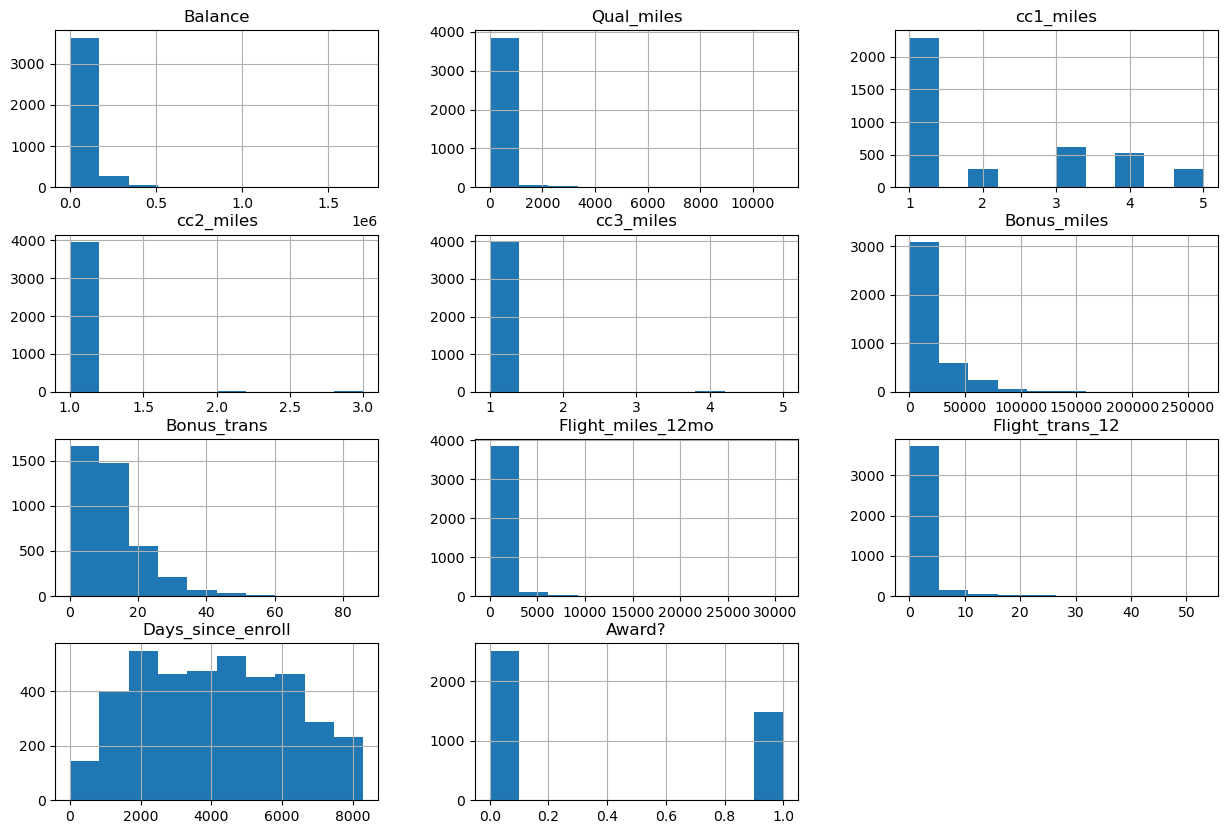

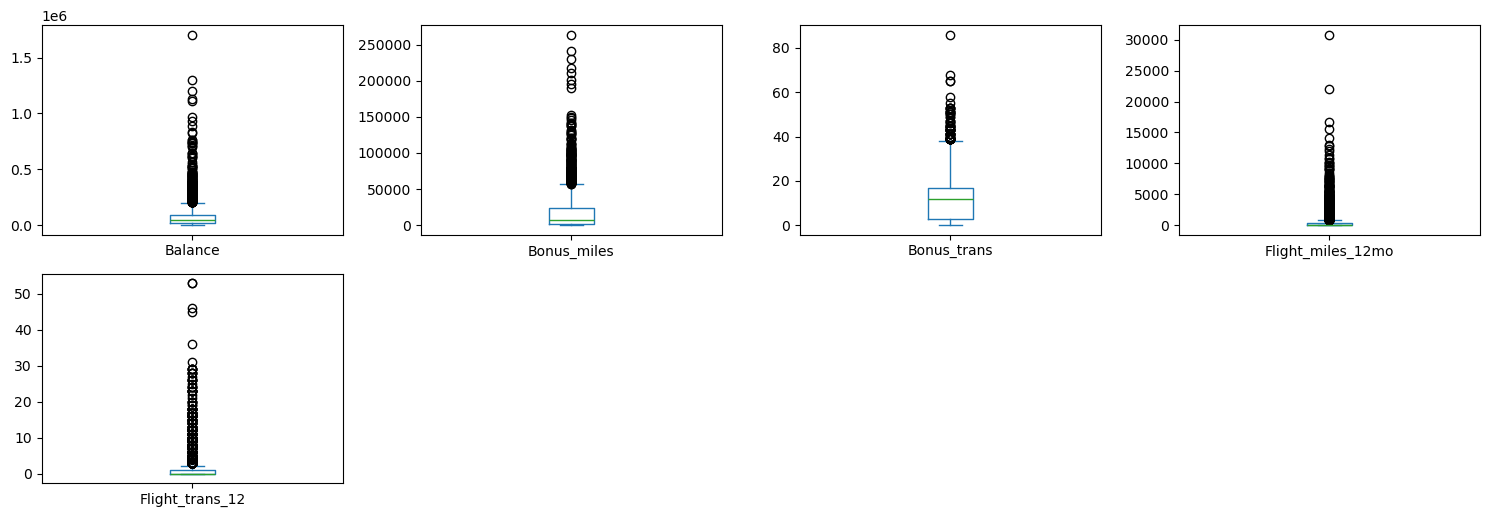

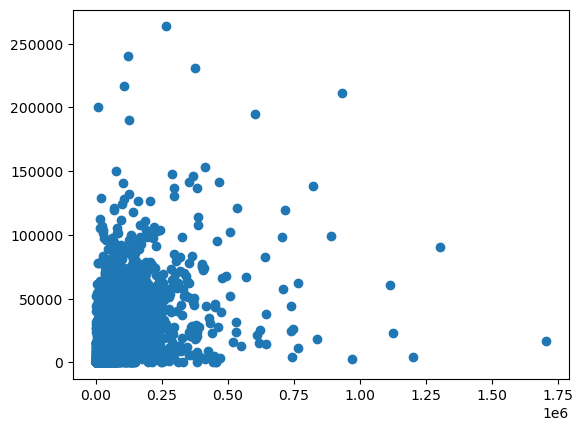

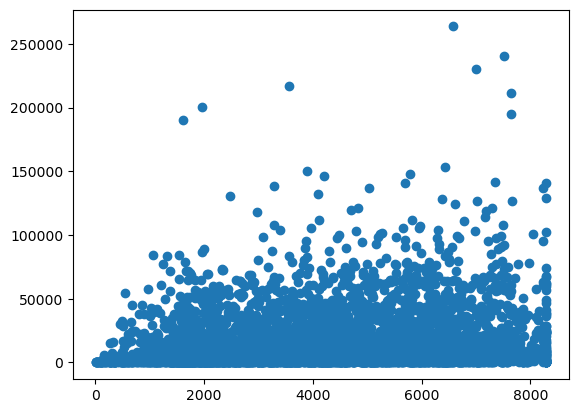

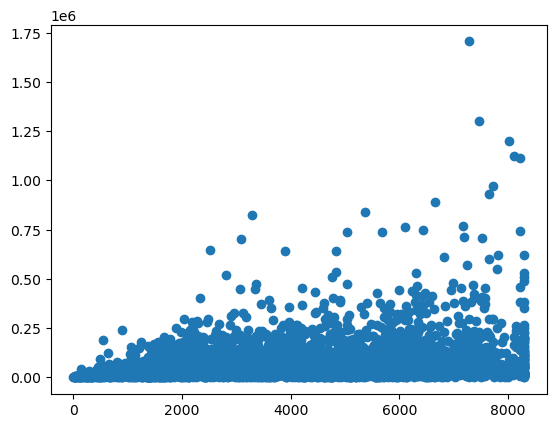

In [4]:
#histogram
df.drop(columns=['ID#']).hist(figsize=(15,10))
plt.show()

#boxplot
df.drop(columns=['ID#','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Days_since_enroll','Award?']).plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.tight_layout()
plt.show()

#Scatterplot
plt.scatter(y=df['Bonus_miles'], x=df['Balance'])
plt.show()

plt.scatter(y=df['Bonus_miles'], x=df['Days_since_enroll'])
plt.show()

plt.scatter(y=df['Balance'], x=df['Days_since_enroll'])
plt.show()

In [5]:
X = df.drop(columns=['ID#']) # id variable will not be sacled
X_col = X.columns.tolist()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns= X_col
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [25]:
df_k=df.copy()
n_clusters = 5
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters,random_state=42)

labels = cluster.fit_predict(df_scaled)

from sklearn.metrics import silhouette_score
score=silhouette_score(df_scaled,labels)
print("K means silhouette score:", np.round(score,3))


K means silhouette score: 0.201


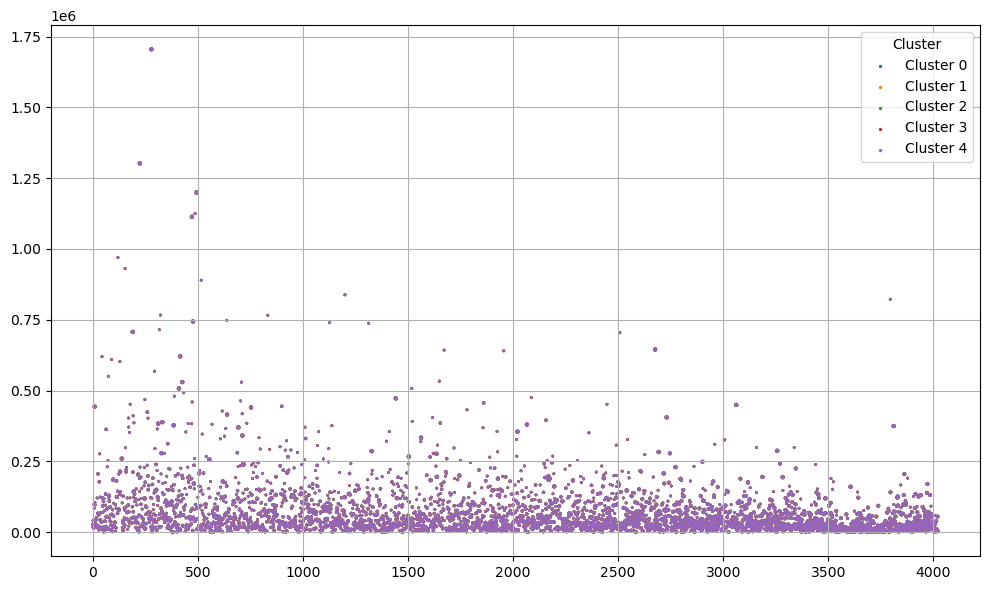

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [26]:
df_k["Kmeans"] = labels
plt.figure(figsize=(10, 6))
for i in range(0, 5): 
    plt.scatter(
        df_k.iloc[:,0], 
        df_k.iloc[:,1],
        labels,
        label=f'Cluster {i}')
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

df_k

[0.32542136327826215, 0.3121716765282414, 0.19071186813310886, 0.20485779742098906, 0.21535599457655183, 0.2675553480692127, 0.2385684505361366, 0.24610357400196978, 0.2622425489631328]


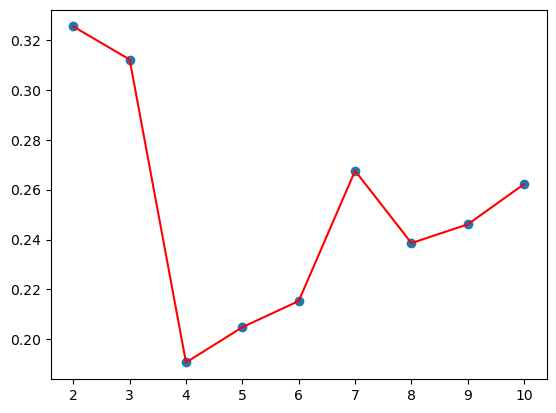

In [31]:
scores = []
for i in range(2,11):
    cluster = KMeans(n_clusters=i)
    labels = cluster.fit_predict(df_scaled)    
    scores.append(silhouette_score(df_scaled,labels))
print(scores)

import matplotlib.pyplot as plt
plt.scatter(x=range(2,11),y=scores)  
plt.plot(range(2,11),scores,color='red')  
plt.show()

In [30]:
df_dbscan = df.copy()
df_dbscan.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [20]:
# DBSCAN
from sklearn.cluster import dbscan
cluster  = dbscan(df_scaled,eps=0.5, min_samples=5)

cluster[0]
cluster[1]
df_dbscan["dbscan"] = pd.DataFrame(cluster[1])

print(df_dbscan.head())

from sklearn.metrics import silhouette_score
score=silhouette_score(df_scaled,df_dbscan["dbscan"])
print("dbscan silhouettescore :", np.round(score,3))


   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   dbscan  
0       0  
1       0  
2       0  
3 

dbscan
 0     1453
-1     1413
 1      268
 5      235
 6      173
 9      115
 3      114
 4      111
 8       52
 10      21
 12       9
 13       9
 14       6
 2        5
 7        5
 11       5
 15       5
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


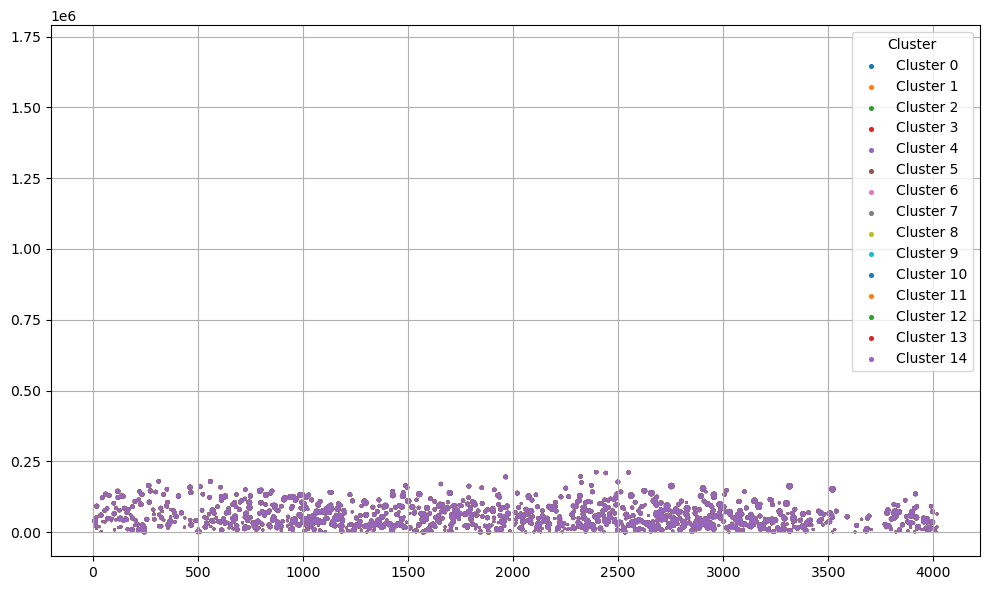

In [21]:
print(df_dbscan['dbscan'].value_counts())

plt.figure(figsize=(10, 6))
for i in range(0, 15): 
    plt.scatter(
        df_dbscan.iloc[:,0], 
        df_dbscan.iloc[:,1],
        df_dbscan["dbscan"],
        label=f'Cluster {i}')
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, fcluster
df_ag= df.copy()
# Create linkage matrix
linked = linkage(df_scaled, method='ward')

# Let's choose a number of clusters (e.g., 3)
n_clusters_hierarchical = 3 # Example number of clusters

# Assign clusters based on the chosen number of clusters
hierarchical_labels = fcluster(linked, n_clusters_hierarchical, criterion='maxclust')

# Add the cluster labels to the original dataframe
df_ag['Hierarchical_Cluster'] = hierarchical_labels

print("\nHierarchical Clustering Results:")
print(df_ag[['ID#', 'Hierarchical_Cluster']].head())
print(df_ag['Hierarchical_Cluster'].value_counts())


Hierarchical Clustering Results:
   ID#  Hierarchical_Cluster
0    1                     1
1    2                     1
2    3                     1
3    4                     1
4    5                     3
Hierarchical_Cluster
1    2489
3    1380
2     130
Name: count, dtype: int64


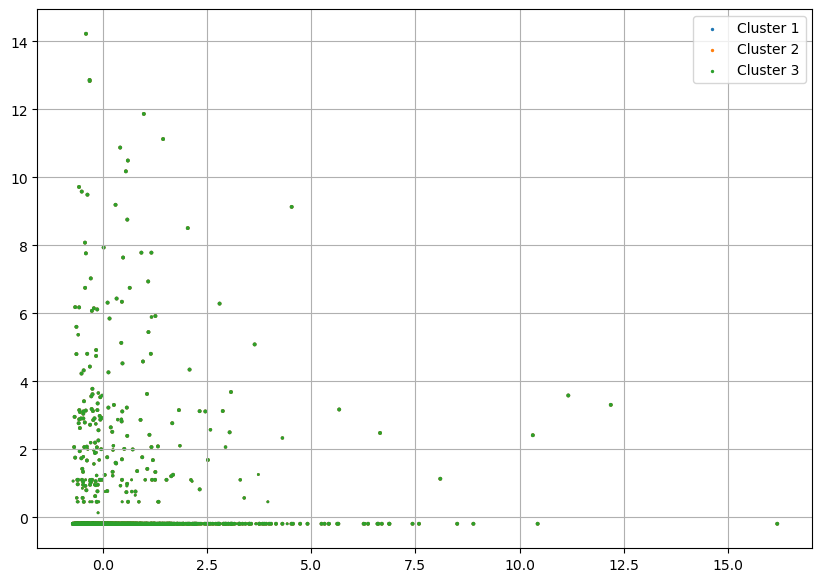

In [23]:
plt.figure(figsize=(10, 7))

for i in range(1, n_clusters_hierarchical + 1): # Hierarchical labels are 1-based by default for fcluster
    plt.scatter(
        df_scaled.iloc[:,0], 
        df_scaled.iloc[:,1],
        df_ag['Hierarchical_Cluster'],
        label=f'Cluster {i}')
plt.legend()
plt.grid(True)
plt.show()
